# Tema 15 :  Face Landmarks

**Face Swapping** son la tendencia extremadamente popular en las redes sociales. Snapchat, Cupace, MSQRD son probablemente las aplicaciones más utilizadas que tienen la opción de intercambio de caras. En pocos segundos puedes intercambiar fácilmente tu rostro con el de tu amigo o con algunas características divertidas. Sin embargo, aunque el intercambio de rostros parece muy sencillo, no es una tarea fácil. Ahora puede preguntarse "¿cómo pueden esas aplicaciones realizar un intercambio de rostros tan avanzado"? Sigue leyendo esta publicación y pronto encontrarás la respuesta.

Para realizar el intercambio de caras, no podemos simplemente recortar una cara y reemplazarla por otra. Lo que tenemos que hacer es localizar los puntos clave que describen la ubicación única de un componente facial en una imagen (ojos, nariz, cejas, boca, mandíbula, etc.). Para hacer esto, necesitamos desarrollar un método de predicción de formas que identifique estructuras faciales importantes. En nuestro código vamos a implementar un método desarrollado por dos investigadores suecos de visión por computadora, Kazemi y Sullivan en 2014, llamado One Millisecond Face Alignment with an Ensemble of Regression Trees. Este detector está integrado en la biblioteca dlib y detecta puntos de referencia faciales muy rápidamente. y con precisión. Para comprender mejor este método, eche un vistazo a la siguiente imagen.

In [35]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Necessary imports
import cv2
import dlib
import numpy as np
from google.colab.patches import cv2_imshow

--2020-08-23 01:44:50--  http://media5.datahacker.rs/2020/05/landmarks-1.jpg
Resolving media5.datahacker.rs (media5.datahacker.rs)... 93.188.2.53, 2a02:250:0:8::51
Connecting to media5.datahacker.rs (media5.datahacker.rs)|93.188.2.53|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22920 (22K) [image/jpeg]
Saving to: ‘face_landmarks.jpg’

face_landmarks.jpg  100%[===================>]  22.38K  --.-KB/s    in 0.1s    

2020-08-23 01:44:50 (194 KB/s) - ‘face_landmarks.jpg’ saved [22920/22920]



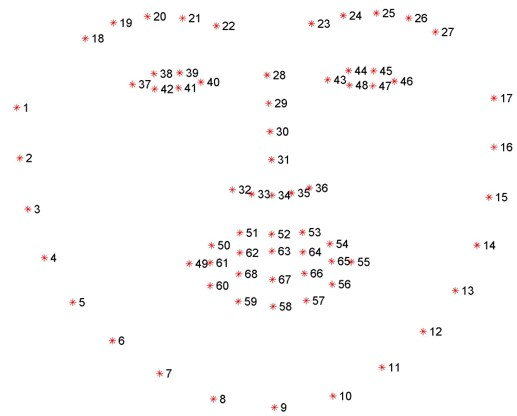

In [24]:
!wget -O 'face_landmarks.jpg' http://media5.datahacker.rs/2020/05/landmarks-1.jpg
cv2_imshow(cv2.imread('face_landmarks.jpg'))

- Puntos Contorno inferior rostro: 1 – 17
- Puntos ceja derecha: 18 – 22
- Puntos ceja izquierda: 23 – 27
- Puntos nariz superior: 28 – 31
- Puntos nariz inferior: 32 – 36
- Puntos ojo derecho: 37 – 42
- Puntos ojos izquierdo: 43 – 48
- Puntos boca exterior: 49 – 60
- Puntos boca interior: 61 – 68

In [25]:
!wget -O 'img2.jpg' https://i2-prod.mirror.co.uk/incoming/article6736696.ece/ALTERNATES/s615/Queen-l-r-Brian-May-Freddie-Mercury-John-Deacon-and-Roger-Taylor.jpg

--2020-08-23 01:44:55--  https://i2-prod.mirror.co.uk/incoming/article6736696.ece/ALTERNATES/s615/Queen-l-r-Brian-May-Freddie-Mercury-John-Deacon-and-Roger-Taylor.jpg
Resolving i2-prod.mirror.co.uk (i2-prod.mirror.co.uk)... 13.224.214.70, 13.224.214.99, 13.224.214.8, ...
Connecting to i2-prod.mirror.co.uk (i2-prod.mirror.co.uk)|13.224.214.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41734 (41K) [image/jpeg]
Saving to: ‘img2.jpg’

img2.jpg            100%[===================>]  40.76K  --.-KB/s    in 0.01s   

2020-08-23 01:44:56 (2.85 MB/s) - ‘img2.jpg’ saved [41734/41734]



In [28]:
# Loading the image and converting it to grayscale
img= cv2.imread('/content/img2.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [29]:
# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()
# Detecting faces in the grayscale image
faces = detector(gray)
print(faces)

rectangles[[(125, 69) (197, 141)], [(294, 102) (381, 189)], [(410, 256) (496, 342)], [(198, 170) (285, 256)]]


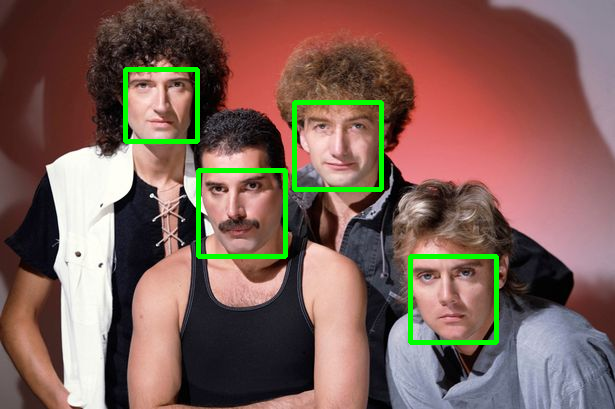

In [30]:
for face in faces:
    x1=face.left()
    y1=face.top()
    x2=face.right()
    y2=face.bottom()
    # Drawing a rectangle around the face
    cv2.rectangle(img, (x1,y1), (x2,y2),(0,255,0),3)
cv2_imshow(img)

In [31]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 "shape_predictor_68_face_landmarks.dat.bz2"

--2020-08-23 01:45:39--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  18.0MB/s    in 3.4s    

2020-08-23 01:45:42 (18.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bunzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [32]:
p = "./shape_predictor_68_face_landmarks.dat"
# Initialize dlib's shape predictor
predictor = dlib.shape_predictor(p)
# Get the shape using the predictor
landmarks=predictor(gray, face)

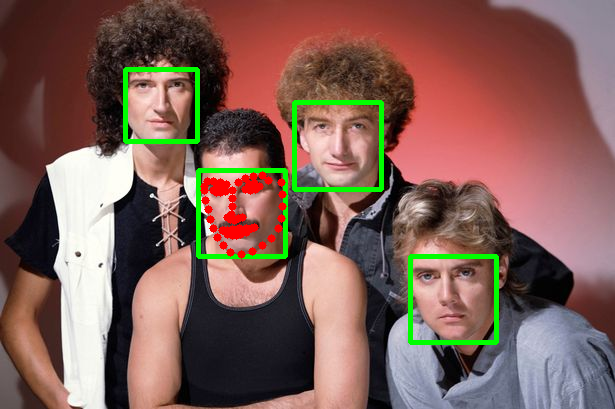

In [33]:
for n in range(0,68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
cv2_imshow(img)

# Face swapping

In [24]:
!git clone https://github.com/BruceMacD/Face-Swap-OpenCV.git

Cloning into 'Face-Swap-OpenCV'...
remote: Enumerating objects: 308, done.
remote: Total 308 (delta 0), reused 0 (delta 0), pack-reused 308
Receiving objects: 100% (308/308), 70.40 MiB | 29.46 MiB/s, done.
Resolving deltas: 100% (172/172), done.


In [25]:
!mv ./Face-Swap-OpenCV/* . 
!rm -rf Face-Swap-OpenCV

In [13]:
import sys
import getopt
import cv2
from components.landmark_detection import detect_landmarks
from components.convex_hull import find_convex_hull
from components.delaunay_triangulation import find_delauney_triangulation
from components.affine_transformation import apply_affine_transformation
from components.clone_mask import merge_mask_with_image
from google.colab.patches import cv2_imshow

In [15]:
!wget -O 'trump.jpg' https://exame.com/wp-content/uploads/2020/07/donald-trump-1.jpg
!wget -O 'musk.jpg' https://image.cnbcfm.com/api/v1/image/105773439-1551717349171rtx6p9uc.jpg?v=1551717410

--2020-08-23 00:24:00--  https://exame.com/wp-content/uploads/2020/07/donald-trump-1.jpg
Resolving exame.com (exame.com)... 192.0.66.56
Connecting to exame.com (exame.com)|192.0.66.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160673 (157K) [image/jpeg]
Saving to: ‘trump.jpg’

trump.jpg           100%[===================>] 156.91K  --.-KB/s    in 0.04s   

2020-08-23 00:24:00 (4.03 MB/s) - ‘trump.jpg’ saved [160673/160673]

--2020-08-23 00:24:02--  https://image.cnbcfm.com/api/v1/image/105773439-1551717349171rtx6p9uc.jpg?v=1551717410
Resolving image.cnbcfm.com (image.cnbcfm.com)... 23.62.214.209
Connecting to image.cnbcfm.com (image.cnbcfm.com)|23.62.214.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 667403 (652K) [image/jpeg]
Saving to: ‘musk.jpg’

musk.jpg            100%[===================>] 651.76K  --.-KB/s    in 0.1s    

2020-08-23 00:24:02 (4.76 MB/s) - ‘musk.jpg’ saved [667403/667403]



In [16]:
img_1 = cv2.imread('trump.jpg')
img_2 = cv2.imread('musk.jpg')

# Modificaciones

- En el archivo components/landmark_detection.py borrar las lineas 54, 55 y 56. En vez de ellos colocar
  - cv2_imshow(img)
- Y al inicio importar:
  - from google.colab.patches import cv2_imshow

In [17]:
landmarks_1 = detect_landmarks(img_1)[0]
landmarks_2 = detect_landmarks(img_2)[0]

Output hidden; open in https://colab.research.google.com to view.

In [18]:
# Usamos el algoritmo convex-hull para extraer una mascara usando los puntos mas
# exteriores.
hull_1, hull_2 = find_convex_hull(landmarks_1, landmarks_2, img_1, img_2)

In [19]:
# Dividir la mascara del rostro en secciones triangulares
delauney_1 = find_delauney_triangulation(img_1, hull_1)
delauney_2 = find_delauney_triangulation(img_2, hull_2)

In [20]:
# Aplicar una imagen en la otra
img_1_face_to_img_2 = apply_affine_transformation(delauney_1, hull_1, hull_2, img_1, img_2)
img_2_face_to_img_1 = apply_affine_transformation(delauney_2, hull_2, hull_1, img_2, img_1)

In [21]:
# Colocar la imagen ya aplicado en la foto original
swap_1 = merge_mask_with_image(hull_2, img_1_face_to_img_2, img_2)
swap_2 = merge_mask_with_image(hull_1, img_2_face_to_img_1, img_1)

In [22]:
cv2_imshow(swap_1)
cv2_imshow(swap_2)

Output hidden; open in https://colab.research.google.com to view.

## Agradecimientos

- https://github.com/BruceMacD/Face-Swap-OpenCV

- www.paperswithcode.com
